<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Liabarires-and-Dataframe" data-toc-modified-id="Import-Liabarires-and-Dataframe-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Liabarires and Dataframe</a></span></li><li><span><a href="#Data-Consistency-Check" data-toc-modified-id="Data-Consistency-Check-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Consistency Check</a></span><ul class="toc-item"><li><span><a href="#Drop-unuseful-columns" data-toc-modified-id="Drop-unuseful-columns-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Drop unuseful columns</a></span></li><li><span><a href="#Missing-values-check" data-toc-modified-id="Missing-values-check-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Missing values check</a></span></li><li><span><a href="#Duplicates-Check" data-toc-modified-id="Duplicates-Check-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Duplicates Check</a></span></li></ul></li><li><span><a href="#Set-up-standard-size-for-any-image" data-toc-modified-id="Set-up-standard-size-for-any-image-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Set up standard size for any image</a></span></li><li><span><a href="#Preparing-data-before-regression-analysis" data-toc-modified-id="Preparing-data-before-regression-analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Preparing data before regression analysis</a></span><ul class="toc-item"><li><span><a href="#Create-a-scatter-plot-to-show-how-these-two-variables-againest-each-other¶" data-toc-modified-id="Create-a-scatter-plot-to-show-how-these-two-variables-againest-each-other¶-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Create a scatter plot to show how these two variables againest each other¶</a></span></li><li><span><a href="#Reshape-these-two-variables-into-numpy-array-and-put-them-into-separate-objects" data-toc-modified-id="Reshape-these-two-variables-into-numpy-array-and-put-them-into-separate-objects-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Reshape these two variables into numpy array and put them into separate objects</a></span></li><li><span><a href="#Split-data-into-a-training-set-and-test-set" data-toc-modified-id="Split-data-into-a-training-set-and-test-set-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Split data into a training set and test set</a></span></li></ul></li><li><span><a href="#Regression-Analysis-by-using-the-chosen-variables" data-toc-modified-id="Regression-Analysis-by-using-the-chosen-variables-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Regression Analysis by using the chosen variables</a></span><ul class="toc-item"><li><span><a href="#Create-a-visualization-to-show-the-regression-line-deeply" data-toc-modified-id="Create-a-visualization-to-show-the-regression-line-deeply-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Create a visualization to show the regression line deeply</a></span></li><li><span><a href="#Checking-model's-summary-statistics" data-toc-modified-id="Checking-model's-summary-statistics-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Checking model's summary statistics</a></span></li><li><span><a href="#Compare-the-predicted-y-values-with-actual-y-values-in-a-dataframe" data-toc-modified-id="Compare-the-predicted-y-values-with-actual-y-values-in-a-dataframe-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Compare the predicted y values with actual y values in a dataframe</a></span></li></ul></li></ul></div>

### Import Liabarires and Dataframe

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Create a import path
path = r'C:\Users\SuperHome\Documents\5000 Movies Analysis\02 Data\Cleaned Data'

In [4]:
# Import 5000 movies dataframe
movie = pd.read_pickle(os.path.join(path,'movie_1024.pkl'))

In [5]:
# Checking shape after importing
movie.shape

(4438, 18)

### Data Consistency Check

#### Drop unuseful columns

In [8]:
movie.columns

Index(['budget', 'genres', 'id', 'popularity', 'Country', 'country_shortname',
       'release_date', 'revenue', 'movie_duration', 'language', 'status',
       'title', 'rating_average', 'vote_count', 'continent', 'duration_flag',
       'recommend_flag', 'RevenueScale'],
      dtype='object')

In [9]:
movie = movie.drop(columns=['id'])

There is no reason to keep the movie 'id' column as I don't do any merging with another table and the index native from pandas is good enough for me.

#### Missing values check

In [10]:
movie.isnull().sum()

budget                0
genres                0
popularity            0
Country               0
country_shortname     0
release_date          0
revenue               0
movie_duration        7
language             65
status                0
title                 0
rating_average        0
vote_count            0
continent             0
duration_flag         0
recommend_flag        0
RevenueScale          0
dtype: int64

In [11]:
movie['movie_duration'].describe()

count    4431.000000
mean      108.203340
std        20.727523
min        14.000000
25%        94.000000
50%       104.000000
75%       118.000000
max       338.000000
Name: movie_duration, dtype: float64

In [12]:
# Fill nan values with mean value as showed above
movie['movie_duration'].fillna(movie['movie_duration'].mean(), inplace=True)

#### Duplicates Check

In [13]:
movie.duplicated().sum()

0

There is no duplicate in this data set.

### Set up standard size for any image

In [14]:
mpl.rcParams['figure.figsize'] = (12,6)
mpl.rcParams['font.size'] = 16

### Preparing data before regression analysis

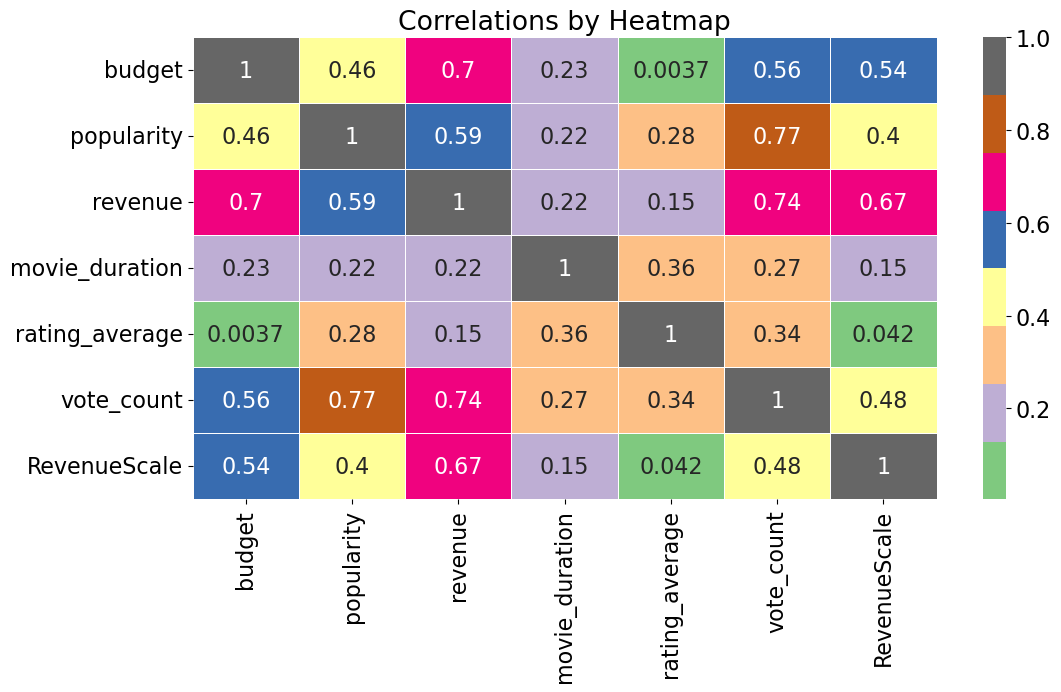

In [40]:
# Create a heatmap to show all correlations for every variable 
sns.heatmap(movie.corr(),
           annot=True,
           cbar=True,
           cmap='Accent',
           linewidth=0.4)
plt.title('Correlations by Heatmap')
plt.show()

The strongest relationship as we explored in the previous task is between popularity and vote_count, next we are going to explore these two variables deeper as the hypothesis is:

The higher vote count, the higher popularity for a movie.

#### Create a scatter plot to show how these two variables againest each other¶

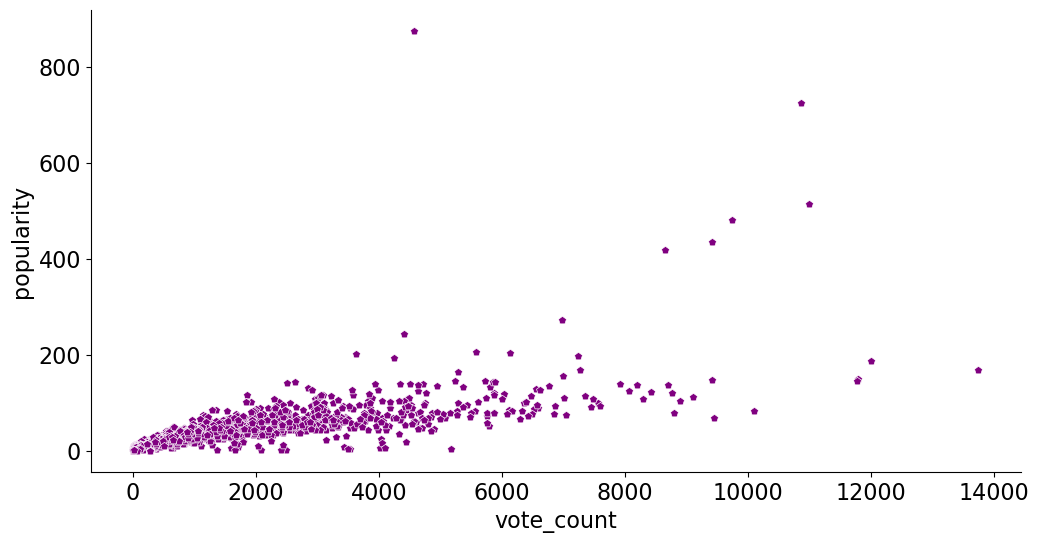

In [34]:
sns.scatterplot(x='vote_count',
               y='popularity',
               data=movie,
               color='Purple',
               marker='p'
               )
sns.despine()
plt.show()

#### Reshape these two variables into numpy array and put them into separate objects

In [21]:
X = movie['vote_count'].values.reshape(-1,1)
y = movie['popularity'].values.reshape(-1,1)

#### Split data into a training set and test set

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

### Regression Analysis by using the chosen variables

In [23]:
# Create a regression object
linreg = LinearRegression()

In [24]:
# Fit the regression object into a trainning set
linreg.fit(X_train, y_train)

LinearRegression()

In [26]:
# Predict the variable y by using variable X
y_pred = linreg.predict(X_test)

#### Create a visualization to show the regression line deeply

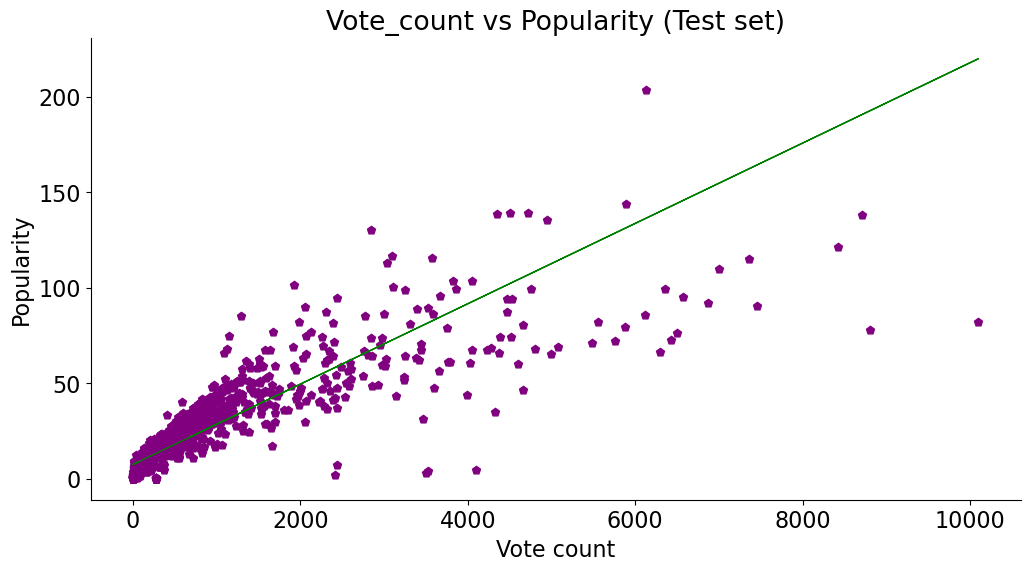

In [35]:
plt.scatter(X_test,y_test,color='Purple',marker='p')
plt.plot(X_test,y_pred,color='Green', linewidth=1)
plt.title('Vote_count vs Popularity (Test set)')
plt.xlabel('Vote count')
plt.ylabel('Popularity')
sns.despine()
plt.show()

The green line indicates the regression line to show these two variables correlation and they have a positive relationship as the number of votes increases, the popularity increases too. However, there are some points clustered in the low popularity range as the number of votes increases, the popularity slightly increrases. In order to check the test model's accuracy I need to check its performance by checking the model's summary statistics.

#### Checking model's summary statistics

In [43]:
# Create object that contain model sumary statistics
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

In [46]:
# Print the model summary
print('Mean squared error:', mse)
print('Slope:', linreg.coef_)
print('R2 score:', r2)

Mean squared error: 181.60496454629765
Slope: [[0.02104266]]
R2 score: 0.6720788276852512


#### Compare the predicted y values with actual y values in a dataframe

In [45]:
df = pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_pred.flatten()})
df.head(20)

,Actual,Predicted
0,3.320622,9.083622
1,3.876242,8.873195
2,7.444189,9.756987
3,7.700190,8.978408
4,7.145832,8.620683
5,4.093288,9.041536
6,11.387335,10.998504
7,13.621201,12.008552
8,65.677399,99.398733
9,11.041659,19.036801


It showed above with the regression analysis, we have a pretty high r2 score 0.67, this score is a value between 0 and 1, values closer to 0 presents a poor fit and values coser to 1 indicates a good fit. Here, we cann't say the model is perfect fit but it actualy above 0.5 which showed a well fit for my project. The popularity for a movie has a strong correlation with vote count for sure.

However, as we also see the above dataframe compared the actual value with predict value we gained most of the values with a samll number, becasue my data set mostly the vote number clustered in the small number range and there aren't too many high numbers in the total data set. This data set might contains collection bias as there are not enough data to surport the entire trend for my hypothesis the higher vote count, the higher popularity. 

Although, the regression analysis shows me a good fit model and a strong relationship between these two variables, along with the number of counts increases, the points started to spread not as clustered as the beginning, it definatelly proves my concern, my data set has collection bias for sure.

The popularity above 200 doesn't show many points from the visualization, and the higher popularity might be effected by the other variables except vote count, this would be the further step for me to explore.

To be continued......

In [47]:
movie.to_pickle(os.path.join(path,'movie_1029.pkl'))